In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'/Users/rajeshpillai'

In [3]:
df = pd.read_excel('/Users/rajeshpillai/Downloads/Online_Retail.xlsx',skiprows=0,header=0)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
(541909 - 406829)/541909 

0.249266943342886

#### Drop missing Customer Information records

In [7]:
df[df.CustomerID.isna()].count()

InvoiceNo      135080
StockCode      135080
Description    133626
Quantity       135080
InvoiceDate    135080
UnitPrice      135080
CustomerID          0
Country        135080
dtype: int64

In [8]:
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [9]:
df[df.CustomerID.isna()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### How many unique customers are there

This segment needs to be functionized

In [11]:
customerid_list= df.CustomerID.unique()

len(customerid_list)

4372

#### How many Countries are there?

In [12]:
country_list = df.Country.unique()

len(country_list)

37

#### How many unique products are there

In [13]:
product_list = df.StockCode.unique()

len(product_list)

3684

In [14]:
df.Description.nunique()

3896

In [15]:
df.Description.head(10)

0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object

#### Which is the most popular product

In [16]:
df_total_qts_by_stockcode = df.groupby(by=['StockCode']) \
                              .Quantity\
                              .sum()

df_total_qts_by_stockcode.head()

StockCode
10002     823
10080     291
10120     193
10125    1226
10133    2374
Name: Quantity, dtype: int64

In [17]:
df_total_qts_by_stockcode = df_total_qts_by_stockcode.reset_index()

In [18]:
df_total_qts_by_stockcode.sort_values(by=['Quantity'])

,StockCode,Quantity
2516,84347,-1460
3679,D,-1194
620,21645,-24
3678,CRUK,-16
309,21144,-12
871,22034,-9
3079,79323W,-8
2336,35400,-6
87,20703,-6
486,21412,-6


In [19]:
type(df_total_qts_by_stockcode)

pandas.core.frame.DataFrame

In [20]:
df[df.StockCode=='D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom
31135,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422.0,United Kingdom
31663,C539003,D,Discount,-1,2010-12-15 12:35:00,26.93,14527.0,United Kingdom
38609,C539589,D,Discount,-1,2010-12-20 13:14:00,13.88,14527.0,United Kingdom
44405,C540171,D,Discount,-1,2011-01-05 12:26:00,22.97,14527.0,United Kingdom
88032,C543752,D,Discount,-1,2011-02-11 14:12:00,64.27,14031.0,United Kingdom


In [21]:
df[df.CustomerID==14527]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,2010-12-05 13:17:00,4.95,14527.0,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-05 13:17:00,4.95,14527.0,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,2010-12-05 13:17:00,3.75,14527.0,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,2010-12-05 13:17:00,3.95,14527.0,United Kingdom
8967,537159,35598B,BLACK CHRISTMAS TREE 60CM,1,2010-12-05 13:17:00,2.95,14527.0,United Kingdom
8968,537159,22866,HAND WARMER SCOTTY DOG DESIGN,3,2010-12-05 13:17:00,2.10,14527.0,United Kingdom
8969,537159,22865,HAND WARMER OWL DESIGN,7,2010-12-05 13:17:00,2.10,14527.0,United Kingdom
8970,537159,22632,HAND WARMER RED RETROSPOT,3,2010-12-05 13:17:00,2.10,14527.0,United Kingdom
8971,537159,22684,FRENCH BLUE METAL DOOR SIGN 9,1,2010-12-05 13:17:00,1.25,14527.0,United Kingdom


In [22]:
df[df.InvoiceNo=='537164']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


#### Most frequently purchasing customer

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df_invoice_by_customer = df.groupby(by=['CustomerID'])\
                           .InvoiceDate\
                           .count() \
                           .reset_index()\
                           .sort_values(by=['InvoiceDate'],ascending=False)

df_invoice_by_customer.head()

,CustomerID,InvoiceDate
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782


In [25]:
df.CustomerID.nunique()

4372

In [26]:
df[df.CustomerID==12415].InvoiceDate.nunique()

25

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df['Amount'] = df.Quantity * df.UnitPrice

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Biggest Customers by Sales Amount

In [29]:
df_customer_by_amount = df.groupby(by=['CustomerID'])\
                          .Amount \
                          .sum() \
                          .reset_index() \
                          .sort_values(by=['Amount'], ascending=False)

print('df_customer_by_amount')
print(df_customer_by_amount.head())

#by date

df_customer_by_date_amount = df.groupby(by=['CustomerID','InvoiceDate'])\
                          .Amount \
                          .sum() \
                          .reset_index() \
                          .sort_values(by=['Amount'], ascending=False)



print('df_customer_by_date_amount')
print(df_customer_by_date_amount.head())

df_customer_by_amount
      CustomerID     Amount
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187482.17
1895     14911.0  132572.62
55       12415.0  123725.45
df_customer_by_date_amount
       CustomerID         InvoiceDate     Amount
15458     16446.0 2011-12-09 09:15:00  168469.60
0         12346.0 2011-01-18 10:01:00   77183.60
10849     15098.0 2011-06-10 15:28:00   38970.00
18915     17450.0 2011-09-20 11:05:00   31698.16
198       12415.0 2011-06-15 13:37:00   23426.81


#### Min and Max of Unit price

In [30]:
df.Amount.min()

-168469.6

In [31]:
df.Amount.sort_values()

540422   -168469.60
61624     -77183.60
222681    -38970.00
422375     -8322.12
173277     -8142.75
173391     -6930.00
160145     -6539.40
160143     -4921.50
160141     -4522.50
268027     -4287.63
406404     -3949.32
349750     -3825.36
160144     -3700.00
160142     -3315.00
293842     -3155.95
271151     -3060.60
320580     -2432.70
144831     -2382.92
406405     -2118.74
144834     -2053.07
150591     -1867.86
390547     -1836.00
342996     -1829.84
73446      -1715.85
117053     -1687.17
117052     -1687.17
390541     -1656.00
309359     -1642.50
268431     -1592.49
144190     -1591.20
            ...    
411229      3285.00
411230      3285.00
411232      3285.00
52771       3315.00
160545      3380.00
348323      3621.00
511421      3651.60
52710       3700.00
19871       3794.40
348319      3825.36
16438       3828.00
533812      3861.00
406406      3949.32
52134       4121.64
422351      4161.06
422376      4161.06
291249      4176.00
160544      4254.50
244419      4401.00


In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Add Year & Month columns

In [33]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month




df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,year,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [34]:
df['year-mon'] = pd.DatetimeIndex(df['InvoiceDate']).to_period('M')

In [35]:
df[df.StockCode=='PADS'].Description.unique()

array(['PADS TO MATCH ALL CUSHIONS'], dtype=object)

### Monthly Sales per Product

In [36]:
df.groupby(by=['StockCode','year','month']).Amount.sum().reset_index()

,StockCode,year,month,Amount
0,10002,2010,12,190.400
1,10002,2011,1,286.450
2,10002,2011,2,42.500
3,10002,2011,3,19.550
4,10002,2011,4,160.650
5,10080,2011,2,1.700
6,10080,2011,6,18.720
7,10080,2011,7,9.360
8,10080,2011,8,23.400
9,10080,2011,9,23.400


In [37]:
import seaborn as sns


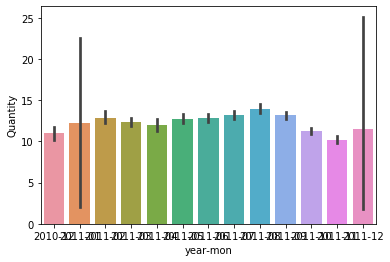

In [38]:
sns.barplot(x='year-mon', y='Quantity', data=df,)

In [42]:
import seaborn as sb
from matplotlib import pyplot as plt



ValueError: color kwarg must have one color per data set. 2 data sets and 1 colors were provided

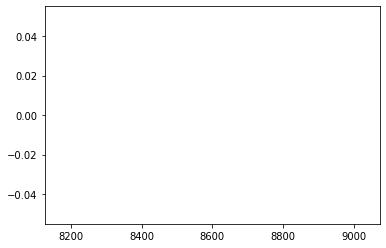

In [45]:
sb.distplot(df_customer_by_amount,kde = False)
plt.show()

In [46]:
df_customer_by_amount.head()

,CustomerID,Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45


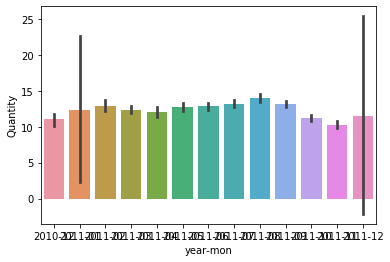

In [47]:
sb.barplot(x=df['year-mon'],y=df['Quantity'])